<a href="https://colab.research.google.com/github/Mahesh-ch06/AIML_2303A52037/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name : Mahesh**

**Batch : 31**

**HallTicket : 2303A52037**


---



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


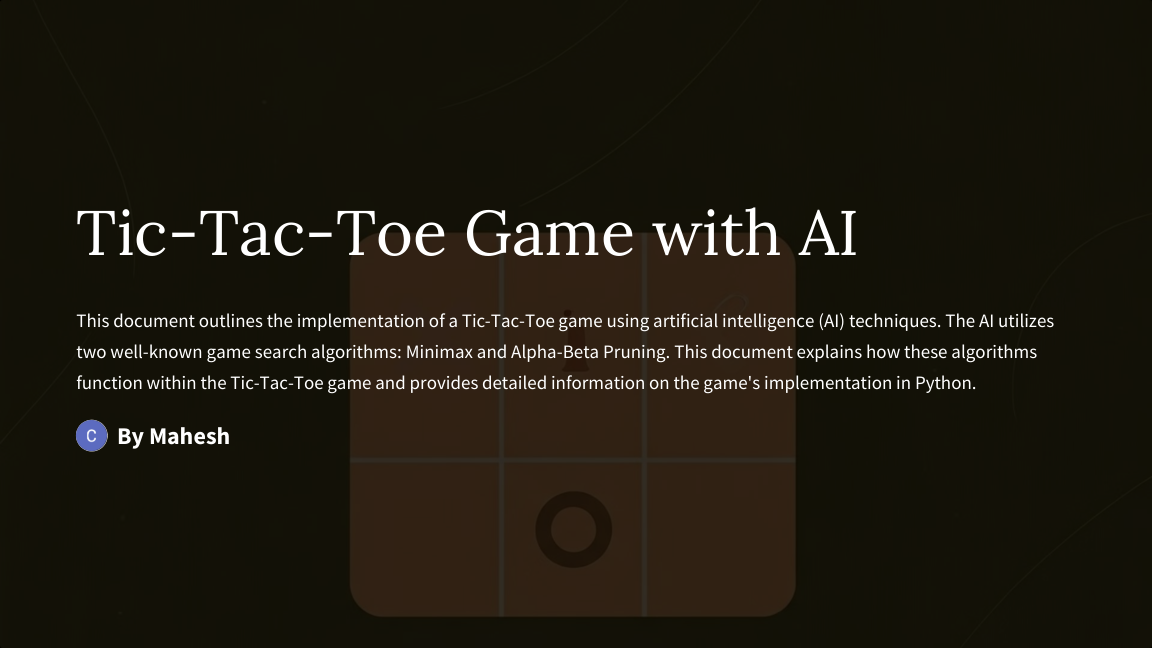

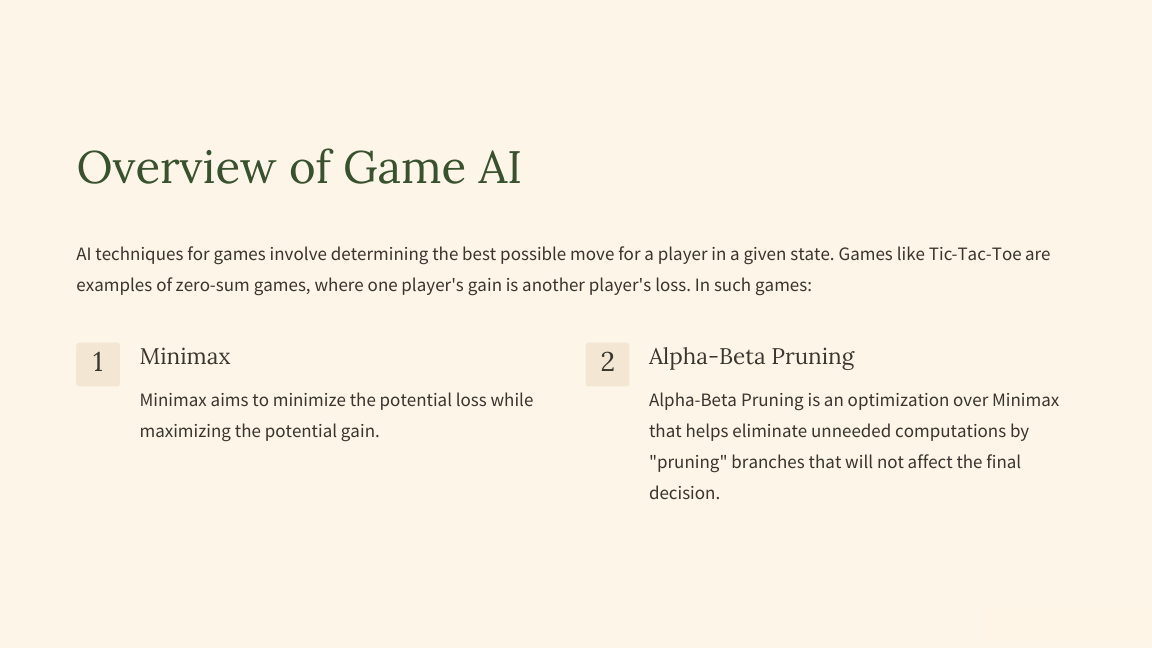

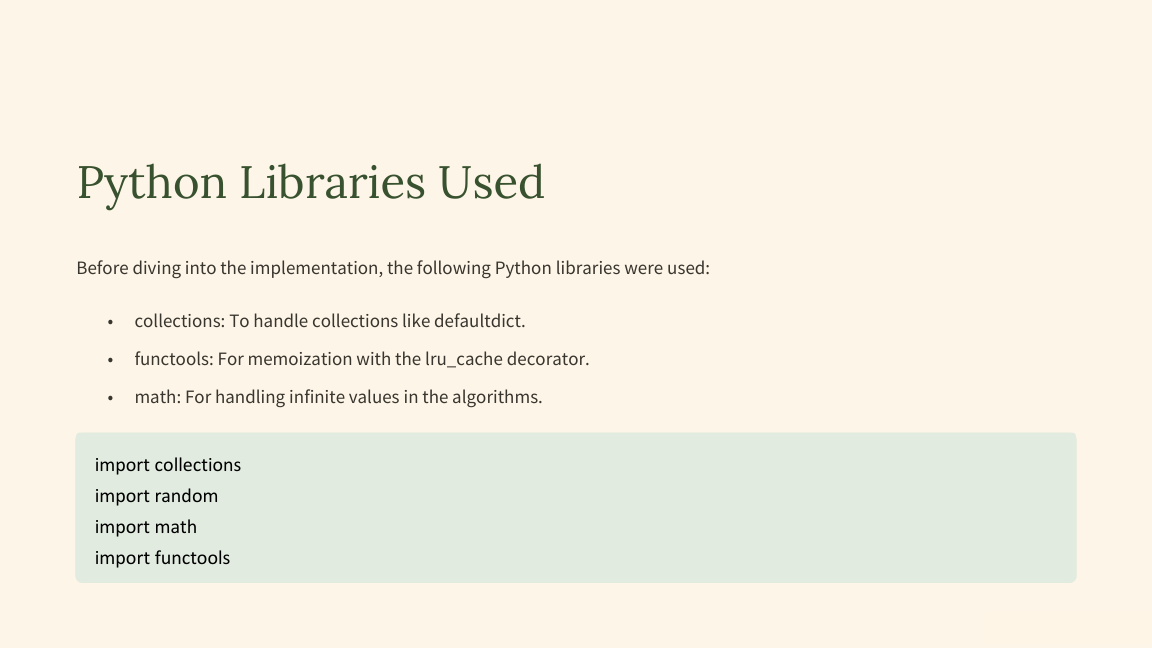

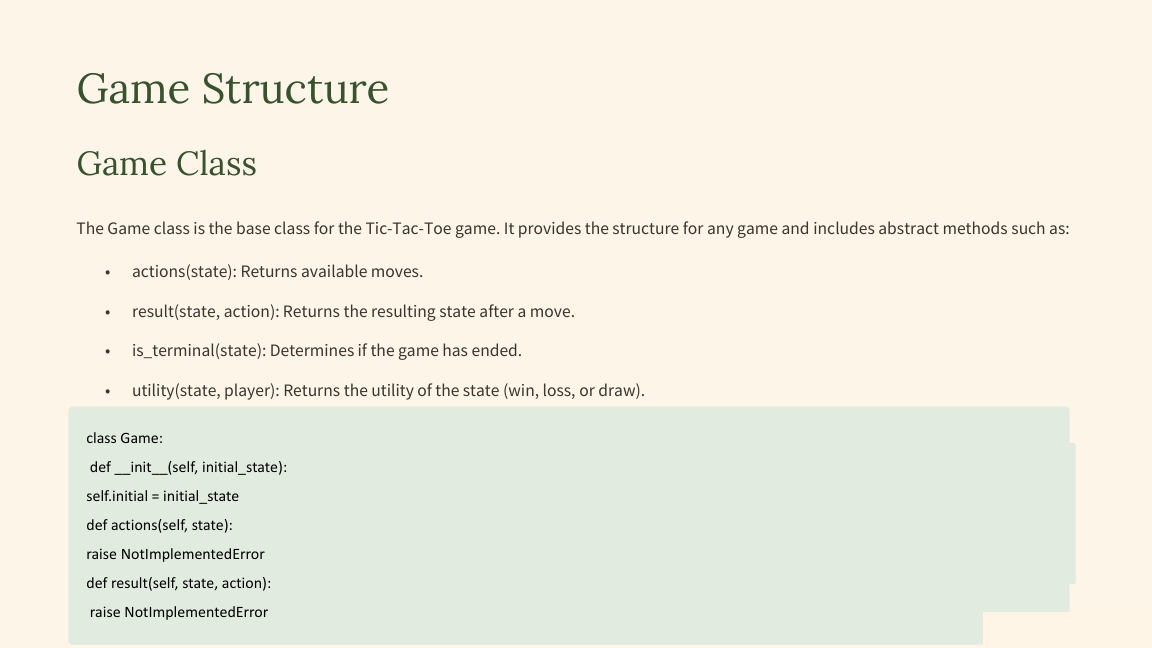

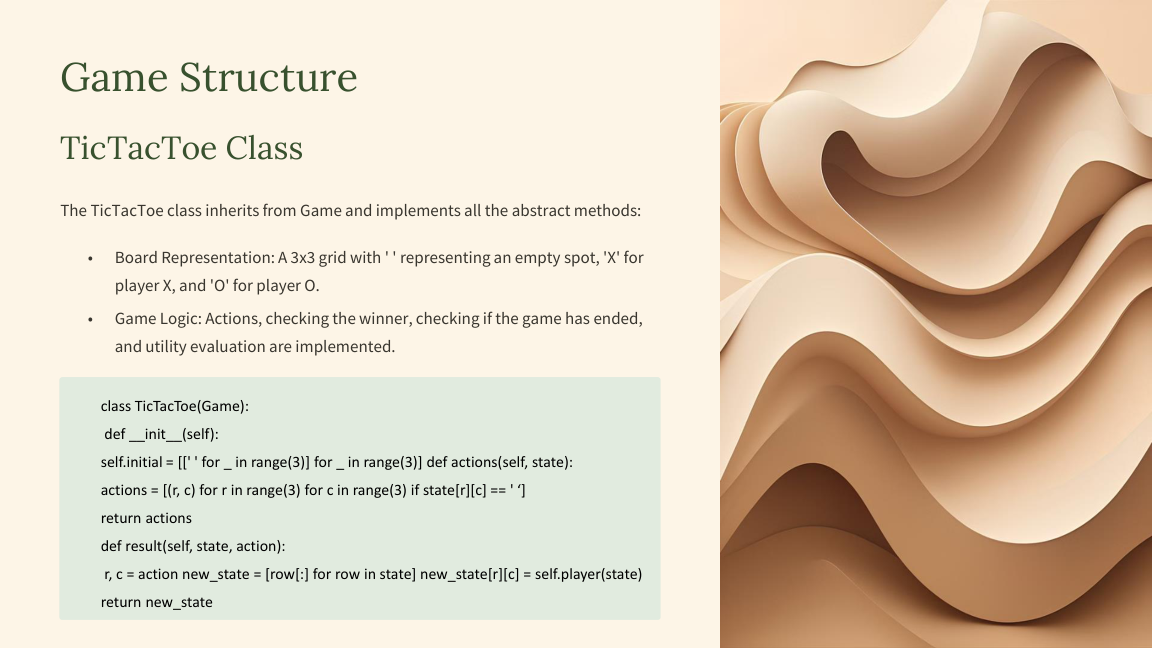

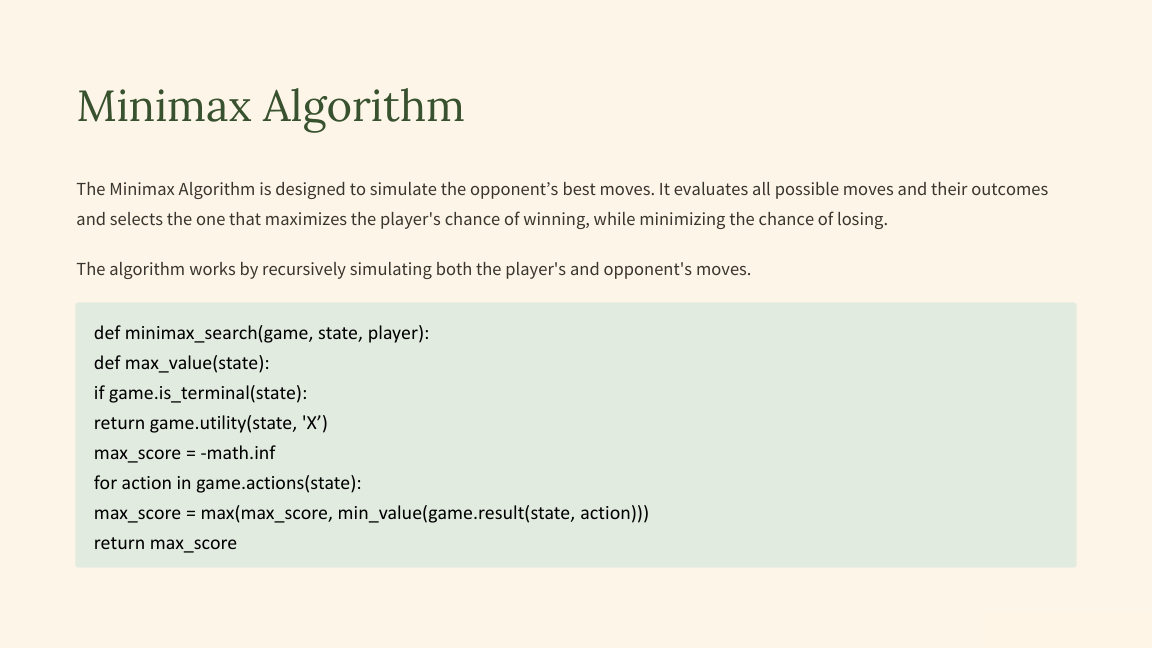

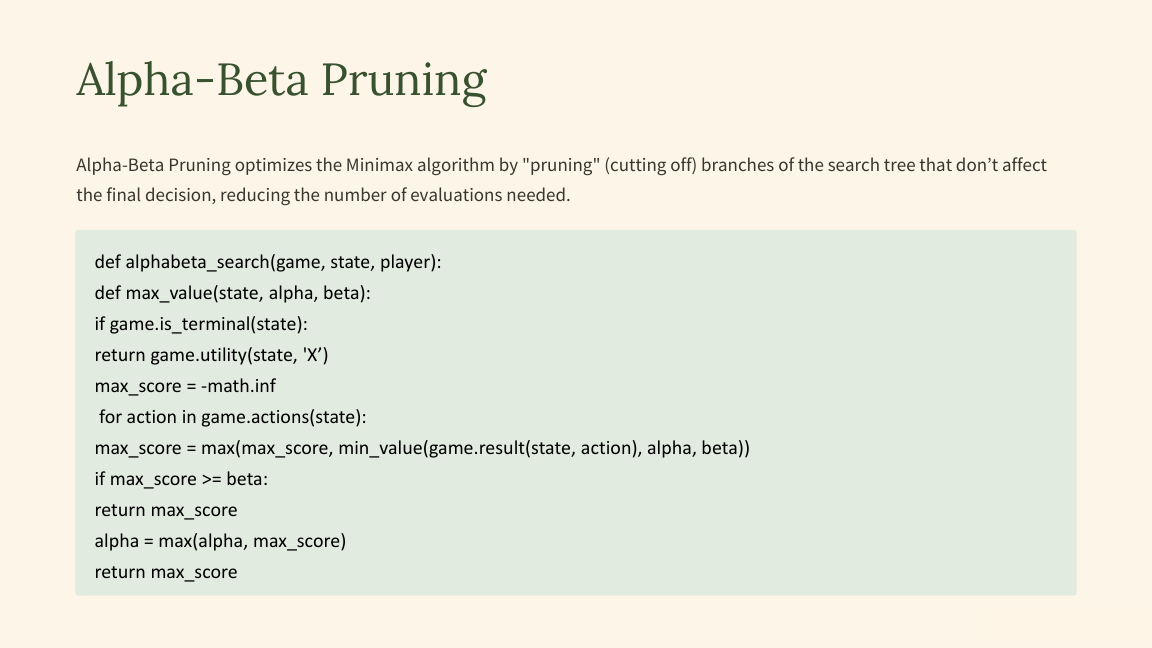

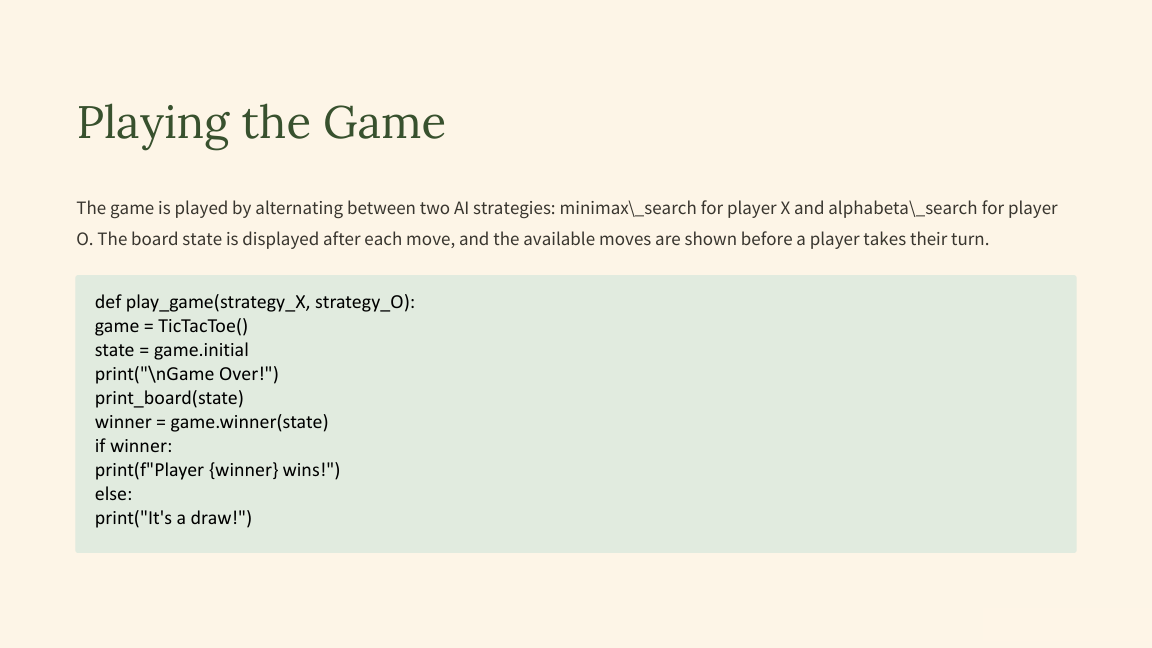

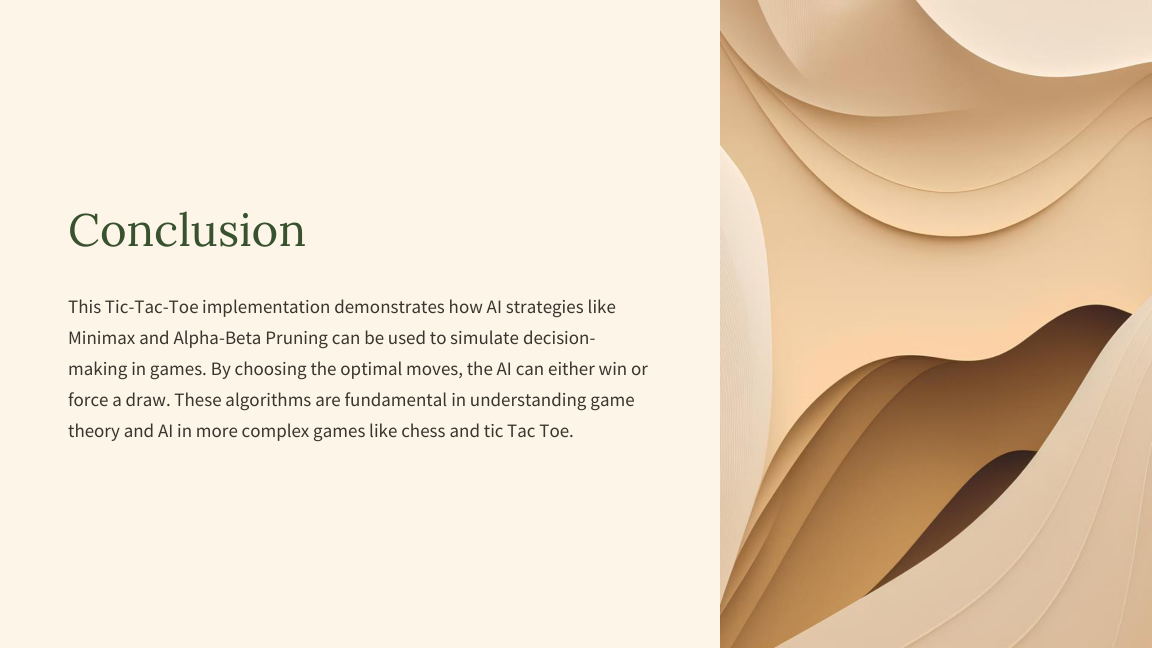

In [46]:
# Doc Of Assigniment...

**1 Implement the AI Game Strategy**

Part 1 –(a). Install the Python Libraries required for Game Strategy
1. Install the python libraries - collections, random, math, functools,
cache = functools.lru cache(10**6)
2. Implement a Game Class Constructor using action, is terminal, result, utility functions
3. A game is similar to a problem, but it has a terminal test instead of a goal test, and a
utility for each terminal state.
4. Create a game subclass and implement actions, result, is terminal, and utility.
5. You will also need to set the initial attribute to the initial state; this can be done in the
constructor.

In [47]:
import collections
import random
import math
import functools

cache = functools.lru_cache(maxsize=10**6)

class Game:
    def __init__(self, initial_state):
        self.initial = initial_state

    def actions(self, state):
        """Return the list of possible actions in the given state."""
        raise NotImplementedError

    def result(self, state, action):
        """Return the resulting state after an action."""
        raise NotImplementedError

    def is_terminal(self, state):
        """Return True if the game is over."""
        raise NotImplementedError

    def utility(self, state, player):
        """Return the utility value of the terminal state for the player."""
        raise NotImplementedError

6. Implement a Player Game using the Game Class Constructor.

In [48]:
def play_game():
    game = TicTacToe()
    state = game.initial

    print("Starting Tic-Tac-Toe Game!")
    while not game.is_terminal(state):
        player_turn = game.player(state)
        print(f"\nPlayer {player_turn}'s turn")
        print_board(state)

        available_actions = game.actions(state)
        print(f"Available actions: {available_actions}")

        if not available_actions:
            print("No available actions. Game over.")
            break

        action = random.choice(available_actions)
        print(f"Player {player_turn} chooses action {action}")

        state = game.result(state, action)

    print("\nGame Over!")
    print_board(state)
    winner = game.winner(state)
    if winner:
        print(f"Player {winner} wins!")
    else:
        print("It's a draw!")

Part 2 – Implement the Game Strategy Algorithms
1. Implement the MiniMax Search Algorithm

In [72]:
def minimax_search(game, state, player):
    def max_value(state):
        if game.is_terminal(state):
            return game.utility(state, 'X')
        max_score = -math.inf
        for action in game.actions(state):
            max_score = max(max_score, min_value(game.result(state, action)))
        return max_score

    def min_value(state):
        if game.is_terminal(state):
            return game.utility(state, 'X')
        min_score = math.inf
        for action in game.actions(state):
            min_score = min(min_score, max_value(game.result(state, action)))
        return min_score

    if player == 'X':
        return max(game.actions(state), key=lambda action: min_value(game.result(state, action)))
    else:
        return min(game.actions(state), key=lambda action: max_value(game.result(state, action)))

# Alpha-Beta Search Algorithm
def alphabeta_search(game, state, player):
    def max_value(state, alpha, beta):
        if game.is_terminal(state):
            return game.utility(state, 'X')
        max_score = -math.inf
        for action in game.actions(state):
            max_score = max(max_score, min_value(game.result(state, action), alpha, beta))
            if max_score >= beta:
                return max_score
            alpha = max(alpha, max_score)
        return max_score

    def min_value(state, alpha, beta):
        if game.is_terminal(state):
            return game.utility(state, 'X')
        min_score = math.inf
        for action in game.actions(state):
            min_score = min(min_score, max_value(game.result(state, action), alpha, beta))
            if min_score <= alpha:
                return min_score
            beta = min(beta, min_score)
        return min_score

    if player == 'X':
        return max(game.actions(state), key=lambda action: min_value(game.result(state, action), -math.inf, math.inf))
    else:
        return min(game.actions(state), key=lambda action: max_value(game.result(state, action), -math.inf, math.inf))


2. Implement the Alpha-Beta Search Algorithm

In [73]:
def alphabeta_search(game, state, player):
    def max_value(state, alpha, beta):
        if game.is_terminal(state):
            return game.utility(state, 'X')
        max_score = -math.inf
        for action in game.actions(state):
            max_score = max(max_score, min_value(game.result(state, action), alpha, beta))
            if max_score >= beta:
                return max_score
            alpha = max(alpha, max_score)
        return max_score

    def min_value(state, alpha, beta):
        if game.is_terminal(state):
            return game.utility(state, 'X')
        min_score = math.inf
        for action in game.actions(state):
            min_score = min(min_score, max_value(game.result(state, action), alpha, beta))
            if min_score <= alpha:
                return min_score
            beta = min(beta, min_score)
        return min_score

    if player == 'X':
        return max(game.actions(state), key=lambda action: min_value(game.result(state, action), -math.inf, math.inf))
    else:
        return min(game.actions(state), key=lambda action: max_value(game.result(state, action), -math.inf, math.inf))


**Random Player**

In [74]:
def random_player(game, state, player):
    return random.choice(game.actions(state))

Part 3 – Implement the Game Strategy using TicTocToe
1. Implement TicToCToe game using init , actions, result, is terminal, utility,
display constructors
2. Implement a Game Board using defaultdict using init , new, missing , hash ,
repr
3. Implement random player(game,state) and player(search algorithm)

In [79]:
def play_game(strategy_X, strategy_O):
    game = TicTacToe()
    state = game.initial

    print("Starting Tic-Tac-Toe Game!")
    while not game.is_terminal(state):
        player_turn = game.player(state)
        print(f"\nPlayer {player_turn}'s turn")
        print_board(state)
        available_moves = game.actions(state)
        print(f"Available moves: {available_moves}")

        if player_turn == 'X':
            action = strategy_X(game, state, player_turn)
        else:
            action = strategy_O(game, state, player_turn)

        print(f"Player {player_turn} chooses action {action}")

        state = game.result(state, action)

    print("\nGame Over!")
    print_board(state)
    winner = game.winner(state)
    if winner:
        print(f"Player {winner} wins!")
    else:
        print("It's a draw!")

def print_board(state):
    for row in state:
        print(' | '.join(row))
        print('-' * 9)


play_game(minimax_search, alphabeta_search)

Starting Tic-Tac-Toe Game!

Player X's turn
  |   |  
---------
  |   |  
---------
  |   |  
---------
Available moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Player X chooses action (0, 0)

Player O's turn
X |   |  
---------
  |   |  
---------
  |   |  
---------
Available moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Player O chooses action (1, 1)

Player X's turn
X |   |  
---------
  | O |  
---------
  |   |  
---------
Available moves: [(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]
Player X chooses action (0, 1)

Player O's turn
X | X |  
---------
  | O |  
---------
  |   |  
---------
Available moves: [(0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]
Player O chooses action (0, 2)

Player X's turn
X | X | O
---------
  | O |  
---------
  |   |  
---------
Available moves: [(1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]
Player X chooses action (2, 0)

Player O's turn
X | X | O
---------
  | O |  
---------
X |   

In [81]:
print("Game play with random player witn minimax_search")
print("")
play_game(random_player, minimax_search)

Game play with random player witn minimax_search
Starting Tic-Tac-Toe Game!

Player X's turn
  |   |  
---------
  |   |  
---------
  |   |  
---------
Available moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Player X chooses action (1, 2)

Player O's turn
  |   |  
---------
  |   | X
---------
  |   |  
---------
Available moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2)]
Player O chooses action (0, 2)

Player X's turn
  |   | O
---------
  |   | X
---------
  |   |  
---------
Available moves: [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2)]
Player X chooses action (2, 2)

Player O's turn
  |   | O
---------
  |   | X
---------
  |   | X
---------
Available moves: [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
Player O chooses action (0, 0)

Player X's turn
O |   | O
---------
  |   | X
---------
  |   | X
---------
Available moves: [(0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
Player X chooses action (2, 1)

Player O's tu

In [82]:
print("Playing with Random Players")
print("")
play_game(random_player, random_player)

Playing with Random Players

Starting Tic-Tac-Toe Game!

Player X's turn
  |   |  
---------
  |   |  
---------
  |   |  
---------
Available moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Player X chooses action (0, 1)

Player O's turn
  | X |  
---------
  |   |  
---------
  |   |  
---------
Available moves: [(0, 0), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Player O chooses action (1, 1)

Player X's turn
  | X |  
---------
  | O |  
---------
  |   |  
---------
Available moves: [(0, 0), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]
Player X chooses action (2, 0)

Player O's turn
  | X |  
---------
  | O |  
---------
X |   |  
---------
Available moves: [(0, 0), (0, 2), (1, 0), (1, 2), (2, 1), (2, 2)]
Player O chooses action (0, 0)

Player X's turn
O | X |  
---------
  | O |  
---------
X |   |  
---------
Available moves: [(0, 2), (1, 0), (1, 2), (2, 1), (2, 2)]
Player X chooses action (1, 2)

Player O's turn
O | X |  
-------